# **🔷🔸  Telco Customer Churn Analysis**

---

## **🔶 Importing Libraries**
---

In [2]:

## Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## **🔶 File Loading through Pandas**
---

In [3]:

## Reading and storing the file in 'df'

df = pd.read_csv('Customer-Churn.csv')


### **⭐ Inspecting the Dataset**

In [8]:

## Getting the shape of the Dataset

df.shape


(7043, 21)

In [4]:

## Getting top 5 rows

df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:

## Getting the info 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:

## Verfying the change

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:

## Checking for nulls

df.isnull().sum()      ## can also write - df.isnull().sum().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:

## Getting the dataset Description

df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:

## Checking for duplicates in customer ID

print(df["customerID"].duplicated().sum())


0


## **🔶 Exploratory Data Analysis - EDA**

---

- ### 1️⃣ *Replacing `blanks` with `0` as tenure is 0 and no total charges are recorded.*

In [ ]:

## Replacing 'blanks' with '0'
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")

## Changing the datatype from object to float
df["TotalCharges"] = df["TotalCharges"].astype("float")


- ### 2️⃣ *Converting `0` and `1` values of senior citizen to `yes/no` to make it easier to understand.*

In [21]:

def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)


- ### 3️⃣ *Count of Customers by Churn*

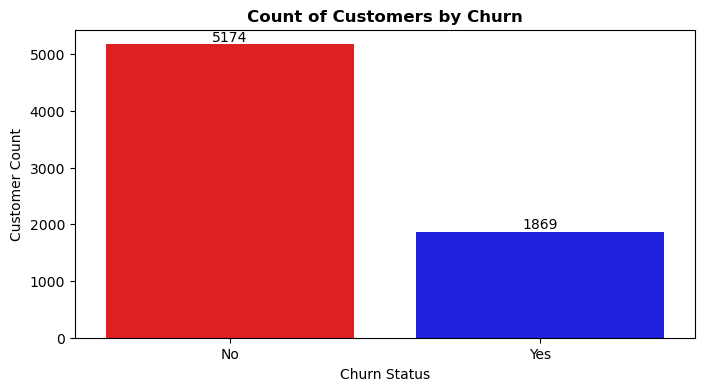

In [92]:

## Count of Customers by Churn

plt.figure(figsize = (8, 4))


ax = sns.countplot(x = 'Churn', data = df, hue = 'Churn', palette = ['red','blue'], 
                   legend = False) # hides duplicate legend

# Add bar labels
for c in ax.containers:
    ax.bar_label(c)

plt.title("Count of Customers by Churn", fontsize = 12, fontweight = 'bold')
plt.xlabel("Churn Status")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


- ### 4️⃣ *Churn Percentage*

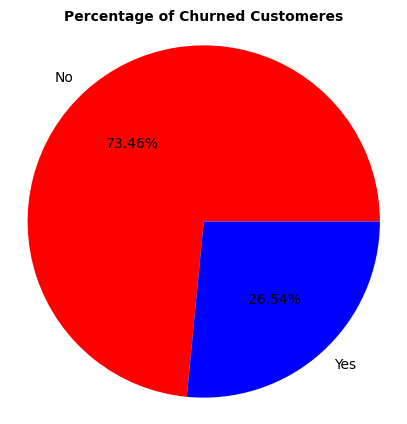

In [113]:

## Churn Percentage using PieChart

plt.figure(figsize = (5, 5))

gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%", colors = ['red','blue'])

plt.title("Percentage of Churned Customeres", fontsize = 10, fontweight = 'bold')
plt.axis('equal')    # for perfect round pie-chart
plt.show()


- #### 🔵 `Conclusion` : *From the given pie chart we can conclude that 26.54% of our customers have churned out.*

### 🔺 **Now let's explore the reason behind it -**

- ### 5️⃣ *Churn by Gender*

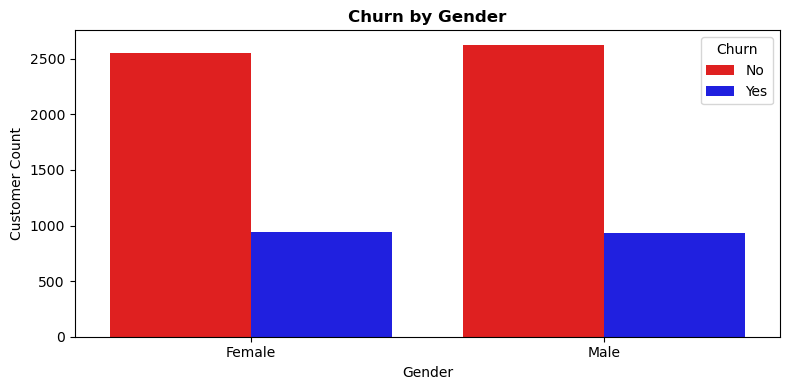

In [95]:

## Churn data by Gender 

plt.figure(figsize = (8, 4))
sns.countplot(x = "gender", data = df, hue = "Churn", palette = ['red','blue'])
plt.title("Churn by Gender", fontsize = 12, fontweight = 'bold')
plt.xlabel("Gender")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


- #### `Conclusion` : *Churning rate of both the gender is almost equal.*

- ### 6️⃣ *Customers by Senior Citizens*

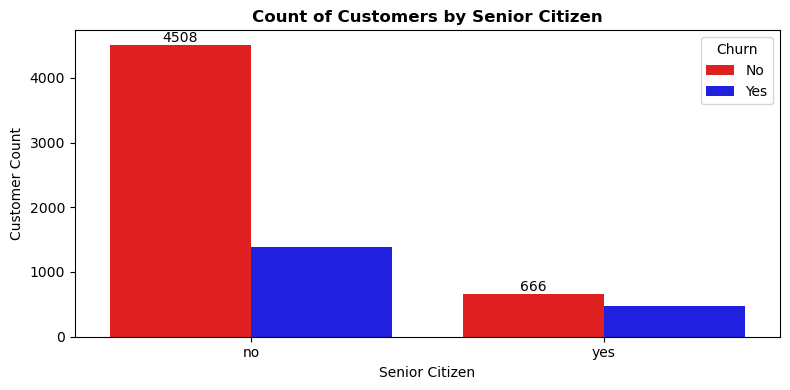

In [96]:

## Count of Customers by Senior Citizen in churn

plt.figure(figsize = (8,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "Churn", palette = ['red','blue'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen", fontsize = 12, fontweight = 'bold')
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


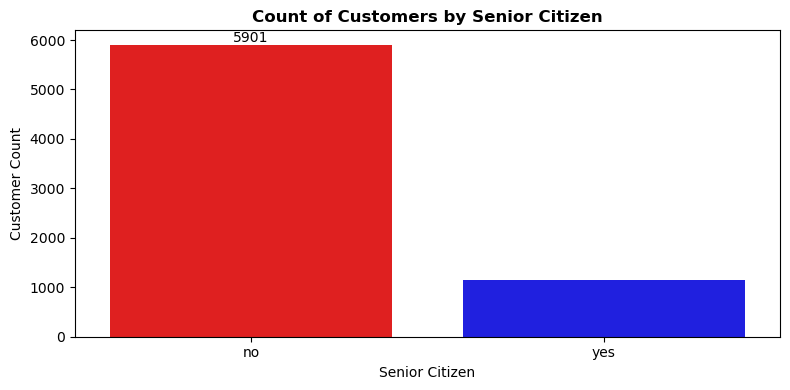

In [97]:

## Count of Customers by Senior Citizen

plt.figure(figsize = (8,4))
ax = sns.countplot(x = "SeniorCitizen", data = df, hue = "SeniorCitizen", palette = ['red','blue'])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen", fontsize = 12, fontweight = 'bold')
plt.xlabel("Senior Citizen")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


- ### 7️⃣ *Churn of Senior Citizens (Stacked Bar Chart)*

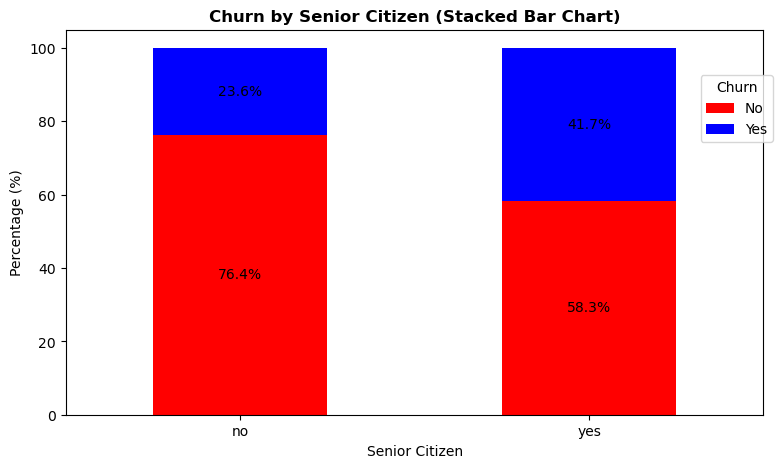

In [99]:

## Stacked Bar Chart

total_counts = df.groupby('SeniorCitizen')['Churn'].value_counts(normalize = True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize = (9, 5))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind = 'bar', stacked = True, ax = ax, color = ['red','blue'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha = 'center', va = 'center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)', fontsize = 12, fontweight = 'bold')
plt.xlabel('Senior Citizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation = 0)
plt.legend(title = 'Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()


- #### `Conclusion` : *Comparative a greater pecentage of people in senior citizen category have churned.*

- ### 8️⃣ *Churn Rate by Tenure*

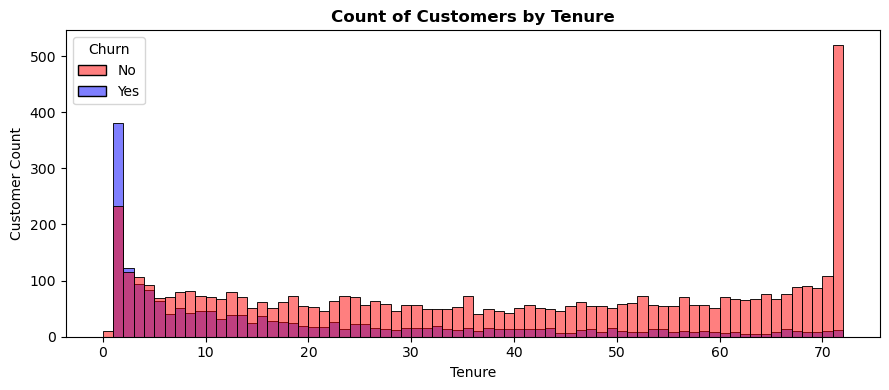

In [100]:

## Histogram 

plt.figure(figsize = (9, 4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn", palette = ['red','blue'])
plt.title("Count of Customers by Tenure", fontsize = 12, fontweight = 'bold')
plt.xlabel("Tenure")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


- #### `Conclusion` : *People who have used our services for a long time have stayed and people who have used our sevices 1 or 2 months have churned.*

- ### 9️⃣ *Churn Rate of Customers by Contract*

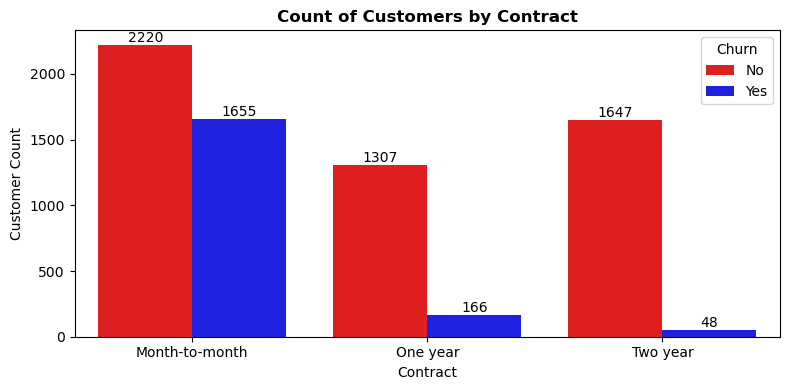

In [103]:

## Count of Customers by Contract

plt.figure(figsize = (8, 4))
ax = sns.countplot(x = "Contract", data = df, hue = "Churn", palette = ['red','blue'])

for c in ax.containers:
    ax.bar_label(c)

plt.title("Count of Customers by Contract", fontsize = 12, fontweight = 'bold')
plt.xlabel("Contract")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()


- #### `Conclusion` : *People who have 'month to month' contract are likely to churn then from those who have '1 or 2 years' or contract.* 

In [56]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [55]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

- ### 🔟 *Subplot*

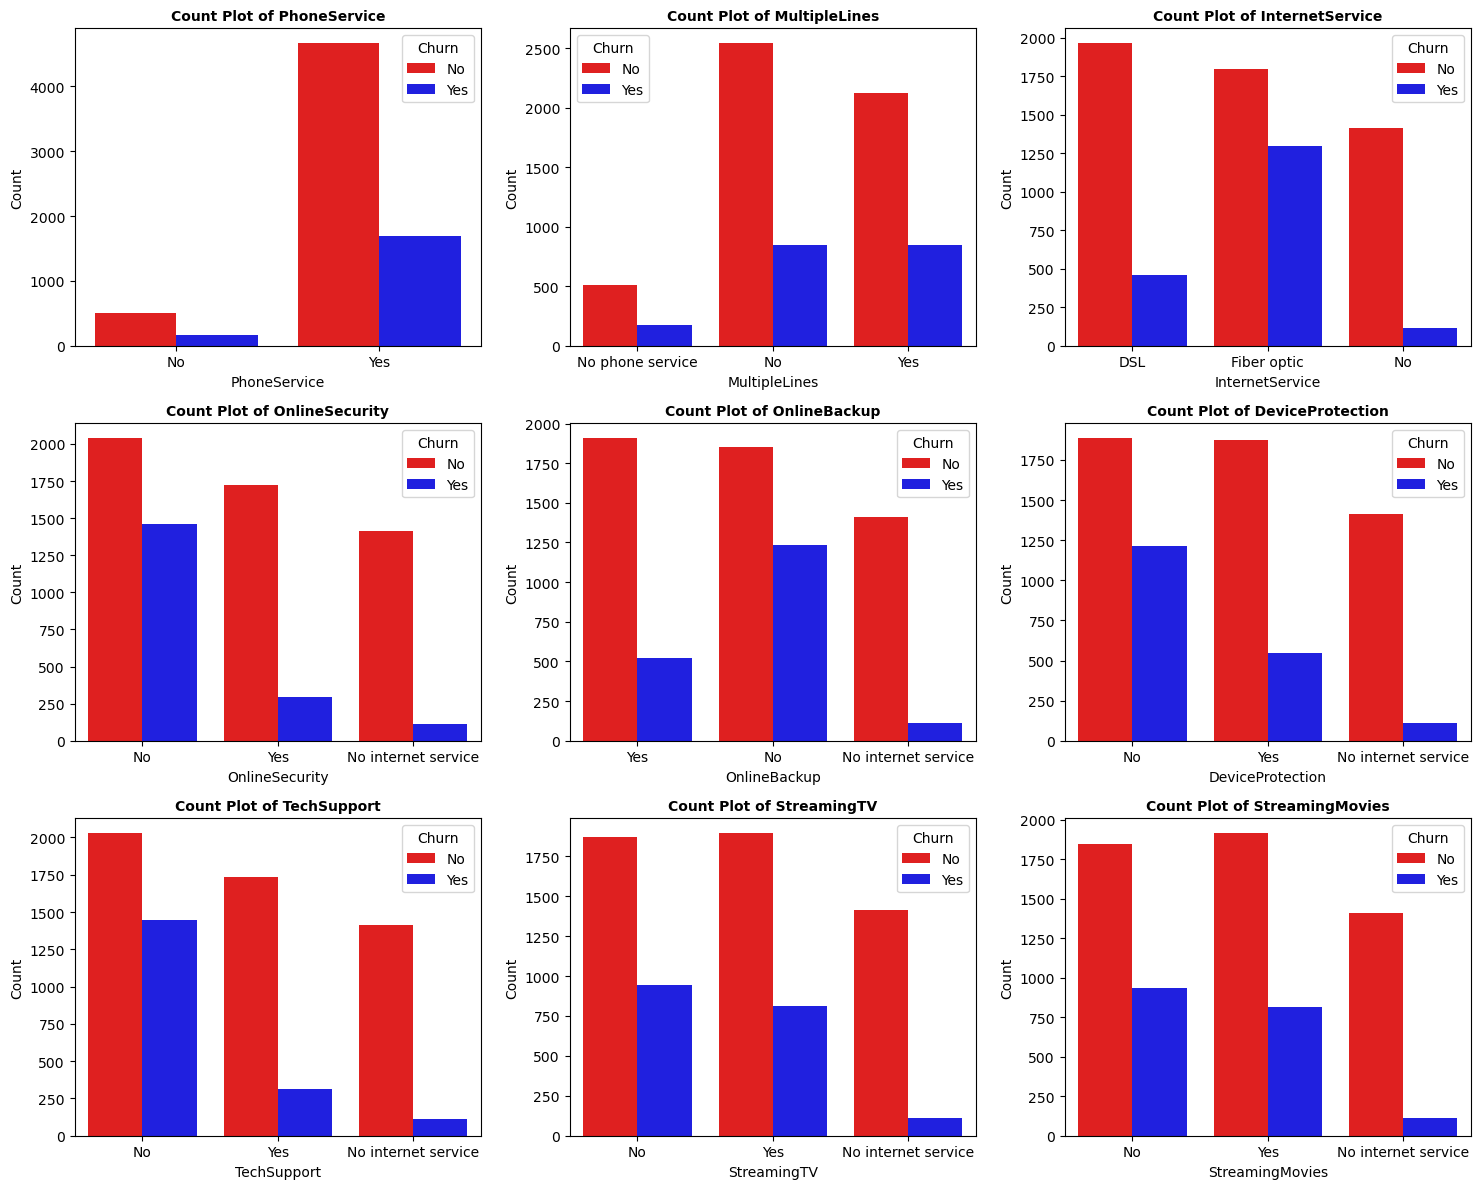

In [105]:


columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize = (15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax = axes[i], hue = df["Churn"], palette = ['red','blue'])
    axes[i].set_title(f'Count Plot of {col}', fontsize = 10, fontweight = 'bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


- #### `Conclusion` - *The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.*

- ### 1️⃣1️⃣ *Churn by Payment Methods*

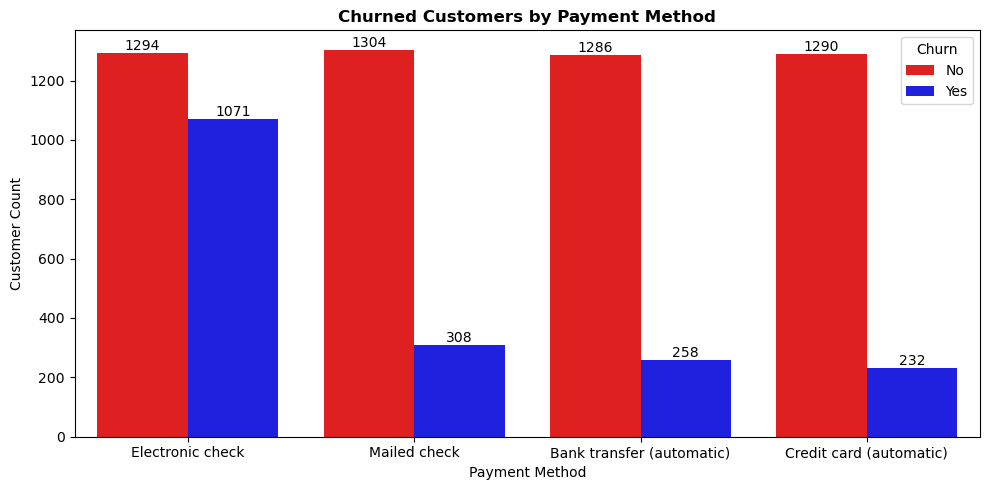

In [109]:

## Churned Customers by Payment Method

plt.figure(figsize = (10, 5))
ax = sns.countplot(x = "PaymentMethod", data = df, hue = "Churn", palette = ['red','blue'])
for c in ax.containers:
    ax.bar_label(c)

plt.title("Churned Customers by Payment Method", fontsize = 12, fontweight = 'bold')
plt.xlabel("Payment Method")
plt.ylabel("Customer Count")
plt.xticks(fontsize = 10, color = 'black')
plt.tight_layout()
plt.show()



- #### `Conclusion` : *Customer is likely to churn when he is using electronic check as a payment method.*

- #### ✅ ***Complete Project on GitHub*** : *https://github.com/ViaSandeep/*

    - #### Thank You !